In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

#### Some helpfull functions

In [48]:
def change_prefix(prev, new, arr: list):
    return [x.replace(prev, new) for x in arr]


def imShow(paths: list):
    assert len(paths) == 5, print('Len paths should be 5')
    %matplotlib inline

    plt.figure(figsize=(18, 3))
    for i, path in enumerate(paths):
        plt.subplot(1, 5, i+1)
        image = cv2.imread(path)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Data processing

## Предпросмотр данных

In [67]:
os.listdir()

['.ipynb_checkpoints',
 '5k.txt',
 'annotations',
 'coco.data',
 'coco.names',
 'coco_big.zip',
 'coco_new.data',
 'coco_new.names',
 'common',
 'Create COCO dataset.ipynb',
 'data_processing.ipynb',
 'images',
 'labels',
 'LuaAPI',
 'MatlabAPI',
 'PythonAPI',
 'results',
 'train.txt',
 'training_on_coco.docx',
 'trainvalno5k.txt',
 'val.txt',
 'yolov4-custom.cfg',
 'yolov4-tiny-custom.cfg',
 'yolov4-tiny.conv.29',
 'yolov4-tiny.weights',
 'yolov4.conv.137']

In [68]:
pd.read_csv('coco.names', header=None)

,0
0,person
1,bicycle
2,car
3,motorbike
4,aeroplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


In [69]:
pd.read_csv('coco.data', sep="=", engine='python', header=None)

,0,1
0,classes\t,2
1,train\t,E:/coco/trainvalno5k.txt
2,valid\t,E:/coco/5k.txt
3,names\t,E:/coco/coco.names
4,backup\t,backup/


In [70]:
train_df = pd.read_csv('trainvalno5k.txt', header=None)
train_df

,0
0,/e/coco/images/train2014/COCO_train2014_000000...
1,/e/coco/images/train2014/COCO_train2014_000000...
2,/e/coco/images/train2014/COCO_train2014_000000...
3,/e/coco/images/train2014/COCO_train2014_000000...
4,/e/coco/images/train2014/COCO_train2014_000000...
...,...
117259,/e/coco/images/val2014/COCO_val2014_0000005818...
117260,/e/coco/images/val2014/COCO_val2014_0000005818...
117261,/e/coco/images/val2014/COCO_val2014_0000005818...
117262,/e/coco/images/val2014/COCO_val2014_0000005819...


In [71]:
val_df = pd.read_csv('5k.txt', header=None)
val_df

,0
0,/e/coco/images/val2014/COCO_val2014_0000000001...
1,/e/coco/images/val2014/COCO_val2014_0000000001...
2,/e/coco/images/val2014/COCO_val2014_0000000002...
3,/e/coco/images/val2014/COCO_val2014_0000000003...
4,/e/coco/images/val2014/COCO_val2014_0000000005...
...,...
4995,/e/coco/images/val2014/COCO_val2014_0000005816...
4996,/e/coco/images/val2014/COCO_val2014_0000005817...
4997,/e/coco/images/val2014/COCO_val2014_0000005817...
4998,/e/coco/images/val2014/COCO_val2014_0000005818...


## Создаем coco.names

In [54]:
coco_names_df = pd.DataFrame(['person', 'car'])
coco_names_df.to_csv(r'coco_new.names', header=None, index=None, sep=' ')
coco_names_df

,0
0,person
1,car


## Создаем coco.data

In [55]:
coco_data_df = pd.read_csv('coco.data', sep="=", engine='python', header=None)
coco_data_df

,0,1
0,classes\t,2
1,train\t,train.txt
2,valid\t,val.txt
3,names\t,coco_new.names
4,backup\t,backup/


In [56]:
coco_data_df[1][1] = ' train.txt'
coco_data_df[1][2] = ' val.txt'
coco_data_df[1][3] = ' coco_new.names'
coco_data_df

,0,1
0,classes\t,2
1,train\t,train.txt
2,valid\t,val.txt
3,names\t,coco_new.names
4,backup\t,backup/


In [57]:
coco_data_df.to_csv(r'coco_new.data', header=None, index=None, sep='=')

## Пересобираем классы
Класс людей - 0  
Класс автомобилей - 2, 7 (car, truck)

In [58]:
train_df[0] = change_prefix('/e/coco/', '', train_df[0].tolist())
train_df

,0
0,images/train2014/COCO_train2014_000000000009.jpg
1,images/train2014/COCO_train2014_000000000025.jpg
2,images/train2014/COCO_train2014_000000000030.jpg
3,images/train2014/COCO_train2014_000000000034.jpg
4,images/train2014/COCO_train2014_000000000036.jpg
...,...
117259,images/val2014/COCO_val2014_000000581831.jpg
117260,images/val2014/COCO_val2014_000000581863.jpg
117261,images/val2014/COCO_val2014_000000581886.jpg
117262,images/val2014/COCO_val2014_000000581913.jpg


In [59]:
val_df[0] = change_prefix('/e/coco/', '', val_df[0].tolist())
val_df

,0
0,images/val2014/COCO_val2014_000000000164.jpg
1,images/val2014/COCO_val2014_000000000192.jpg
2,images/val2014/COCO_val2014_000000000283.jpg
3,images/val2014/COCO_val2014_000000000397.jpg
4,images/val2014/COCO_val2014_000000000589.jpg
...,...
4995,images/val2014/COCO_val2014_000000581655.jpg
4996,images/val2014/COCO_val2014_000000581731.jpg
4997,images/val2014/COCO_val2014_000000581781.jpg
4998,images/val2014/COCO_val2014_000000581887.jpg


In [60]:
class_0 = 0
class_1 = 0

def data_filter(df, max_objects=10000, delete=True):
    
    def reindex_classes(txt_file):
        global class_0, class_1
        # print(txt_file)
        txt_file[0] = txt_file[0].replace([2, 7], 1)
        class_0 += txt_file[0].tolist().count(0)
        class_1 += txt_file[0].tolist().count(1)
        return txt_file
    
    def check_classses_in_txt(filename_txt):
        txt_file = pd.read_csv(filename_txt, header=None, sep=' ')
        # print(txt_file)

        # limit images of each classes in dataset
        if class_0 < max_objects and class_1 < max_objects:
            txt_file = txt_file.drop(txt_file[(txt_file[0] != 0) & (txt_file[0] != 2) & (txt_file[0] != 7)].index)
        elif class_0 >= max_objects and class_1 < max_objects:
            txt_file = txt_file.drop(txt_file[(txt_file[0] != 2) & (txt_file[0] != 7)].index)
        elif class_1 >= max_objects and class_0 < max_objects:
            txt_file = txt_file.drop(txt_file[txt_file[0] != 0].index)
        else:
            return False

        # print(txt_file)
        if len(txt_file[0]):
            txt_file = reindex_classes(txt_file)
            txt_file.to_csv(filename_txt, header=None, index=None, sep=' ', mode='w')
            return True
        return False


    new_filenames = []
    for filename in tqdm(df[0]):
        # print(os.path.isfile(filename), '\t', filename)
        subdir_, file_ = filename.split('/')[-2:]
        # print(subdir_, file_)
        filename_txt = 'labels/' + subdir_ + '/' + file_.split('.')[0] + '.txt'
        # print(os.path.isfile(filename_txt), '\t', filename_txt)
        if os.path.isfile(filename_txt) and os.path.isfile(filename):
            # print(filename, '\t', filename_txt)
            if not check_classses_in_txt(filename_txt):
                if delete:
                    if os.path.isfile(filename_txt): os.remove(filename_txt)
                    if os.path.isfile(filename): os.remove(filename)
            else:
                # print('Success')
                new_filenames += [filename]
        elif delete:
            if os.path.isfile(filename_txt): os.remove(filename_txt)
            if os.path.isfile(filename): os.remove(filename)
            
    return pd.DataFrame(new_filenames)

In [61]:
def clean_useless_imgs(dir_: str, using_imgs: list):
    removed = 0
    all_imgs = [dir_ + i for i in os.listdir(dir_)]
    for img in all_imgs:
        if img not in using_imgs:
            removed += 1
            os.remove(img)
    print(f'Removed {removed}')

In [62]:
class_0 = 0
class_1 = 0

train_df_new = data_filter(train_df, 20000)
print(class_0, class_1)
train_df_new

100%|█████████████████████████████████| 117264/117264 [13:29<00:00, 144.93it/s]

20002 20006


,0
0,images/train2014/COCO_train2014_000000000036.jpg
1,images/train2014/COCO_train2014_000000000049.jpg
2,images/train2014/COCO_train2014_000000000061.jpg
3,images/train2014/COCO_train2014_000000000064.jpg
4,images/train2014/COCO_train2014_000000000071.jpg
...,...
9508,images/train2014/COCO_train2014_000000307125.jpg
9509,images/train2014/COCO_train2014_000000307136.jpg
9510,images/train2014/COCO_train2014_000000307182.jpg
9511,images/train2014/COCO_train2014_000000307194.jpg


In [63]:
class_0 = 0
class_1 = 0

val_df_new = data_filter(val_df, 2500)
print(class_0, class_1)
val_df_new

100%|█████████████████████████████████████| 5000/5000 [00:39<00:00, 128.01it/s]

2501 2018


,0
0,images/val2014/COCO_val2014_000000000192.jpg
1,images/val2014/COCO_val2014_000000000397.jpg
2,images/val2014/COCO_val2014_000000000589.jpg
3,images/val2014/COCO_val2014_000000000764.jpg
4,images/val2014/COCO_val2014_000000000872.jpg
...,...
1122,images/val2014/COCO_val2014_000000574988.jpg
1123,images/val2014/COCO_val2014_000000576085.jpg
1124,images/val2014/COCO_val2014_000000576857.jpg
1125,images/val2014/COCO_val2014_000000579902.jpg


In [64]:
clean_useless_imgs('images/train2014/', train_df_new[0].tolist())
clean_useless_imgs('images/val2014/', val_df_new[0].tolist())

Removed 702
Removed 321


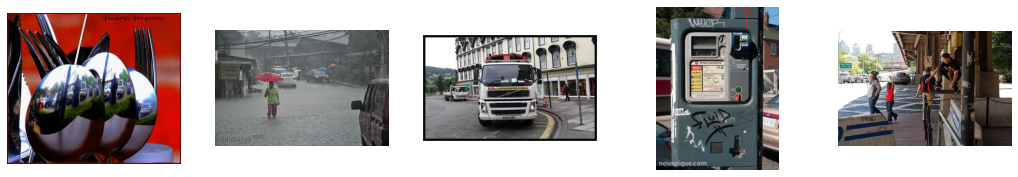

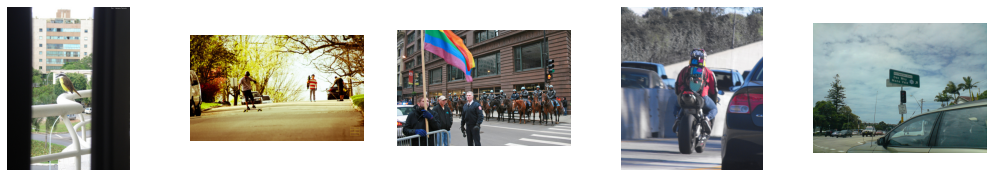

In [65]:
imShow(train_df_new[0].tolist()[-5:])
imShow(val_df_new[0].tolist()[-5:])

# Save new txt files

In [66]:
train_df_new.to_csv(r'train.txt', header=None, index=None, sep=' ')
val_df_new.to_csv(r'val.txt', header=None, index=None, sep=' ')